In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import KMeans

In [3]:
np.random.seed(42)

# Clustering demographic perspective

In [4]:
df_demo=pd.read_csv('df_demo.csv',delimiter=',')
df_demo.set_index('customer_id',inplace=True)
df_demo.head()

,customer_age
customer_id,
1b8f824d5e,0.046154
5d272b9dcb,0.030769
f6d1b2ba63,0.353846
180c632ed8,0.169231
4eb37a6705,0.076923


In [4]:
cluster_range = range(2, 16)

# Lists to store evaluation metrics
inertia = []
avg_silhouette = []

# Iterate over the range of clusters
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=15, random_state=42)
    cluster_labels = kmeans.fit_predict(df_demo)

    # Compute and store Inertia
    inertia.append(kmeans.inertia_)

    # Compute and store Average Silhouette Score
    silhouette_avg = silhouette_score(df_demo, cluster_labels)
    avg_silhouette.append(silhouette_avg)


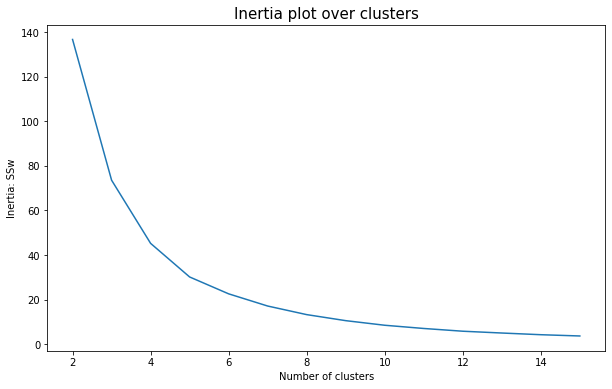

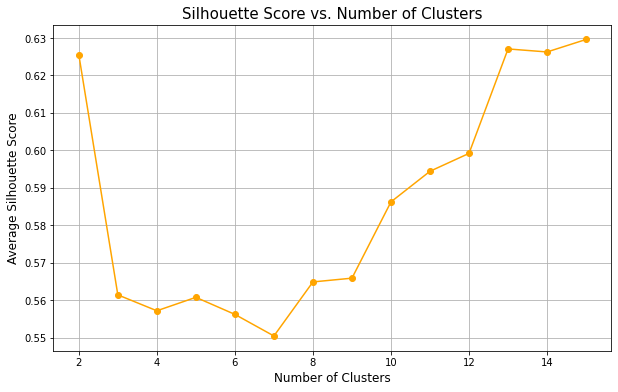

In [5]:
plt.figure(figsize=(10,6))
plt.plot(cluster_range, inertia)
plt.ylabel("Inertia: SSw")
plt.xlabel("Number of clusters")
plt.title("Inertia plot over clusters", size=15)
plt.show()

# Plot Average Silhouette Score
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, avg_silhouette, marker='o', color='orange')
plt.title("Silhouette Score vs. Number of Clusters", size=15)
plt.xlabel("Number of Clusters", size=12)
plt.ylabel("Average Silhouette Score", size=12)
plt.grid(True)
plt.show()



5 clusters appear to balance most metrics (silhouette score, inertia)

In [5]:
kmeans1 = KMeans(n_clusters=5, random_state=42)
kmeans_labels_demo = kmeans1.fit_predict(df_demo)

In [6]:
kmeans_labels_demo

array([0, 0, 1, ..., 0, 3, 3], dtype=int32)

In [7]:
df_demo['cluster']=kmeans_labels_demo

# Clustering behaviour perspective

In [8]:
df_behaviour=pd.read_csv('df_behaviour.csv',delimiter=',')
df_behaviour.set_index('customer_id',inplace=True)
df_behaviour.head()

,0,1,2,3,4
customer_id,,,,,
5d272b9dcb,0.137368,0.000000,0.596236,0.801604,0.180086
f6d1b2ba63,0.216043,0.020715,0.303097,0.871193,0.191494
180c632ed8,0.142785,0.006192,0.599059,0.797506,0.263937
6aef2b6726,0.141288,0.006068,0.601937,0.806123,0.189800
8475ee66ef,0.141747,0.005733,0.600668,0.804385,0.175570


In [9]:
cluster_range = range(2, 12)

# Lists to store evaluation metrics
inertia = []
avg_silhouette = []

# Iterate over the range of clusters
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=15, random_state=42)
    cluster_labels = kmeans.fit_predict(df_behaviour)

    # Compute and store Inertia
    inertia.append(kmeans.inertia_)

    # Compute and store Average Silhouette Score
    silhouette_avg = silhouette_score(df_behaviour, cluster_labels)
    avg_silhouette.append(silhouette_avg)

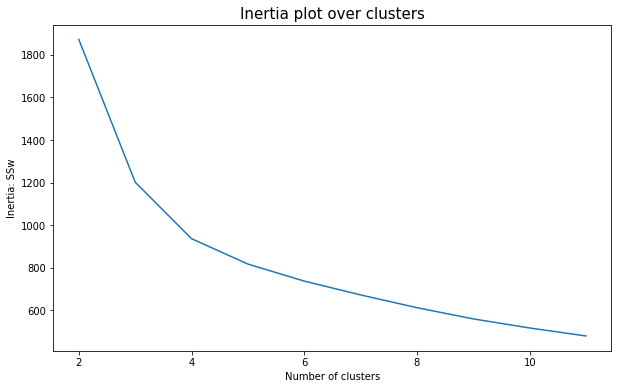

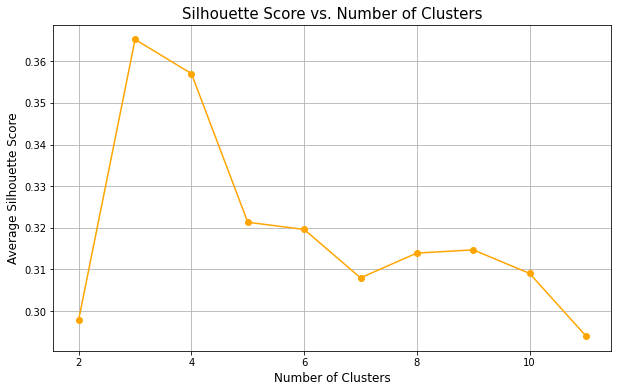

In [10]:
plt.figure(figsize=(10,6))
plt.plot(cluster_range, inertia)
plt.ylabel("Inertia: SSw")
plt.xlabel("Number of clusters")
plt.title("Inertia plot over clusters", size=15)
plt.show()

# Plot Average Silhouette Score
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, avg_silhouette, marker='o', color='orange')
plt.title("Silhouette Score vs. Number of Clusters", size=15)
plt.xlabel("Number of Clusters", size=12)
plt.ylabel("Average Silhouette Score", size=12)
plt.grid(True)
plt.show()

4 clusters appear to balance most metrics (silhouette score, inertia)

In [10]:
kmeans2 = KMeans(n_clusters=3, random_state=42)
kmeans_labels_behaviour = kmeans2.fit_predict(df_behaviour)

In [11]:
df_behaviour['cluster']=kmeans_labels_behaviour

# Clustering psychographic perspective

In [12]:
df_psy=pd.read_csv('df_psy.csv',delimiter=',')
df_psy.set_index('customer_id',inplace=True)
df_psy.head()

,0,1,2,3,4,5,6,7,8,9
customer_id,,,,,,,,,,
1b8f824d5e,0.034845,0.290847,0.418229,0.386820,0.151880,0.454095,0.410637,0.428278,0.188199,0.063374
5d272b9dcb,0.065898,0.315260,0.418412,0.390004,0.135756,0.425134,0.348124,0.471136,0.192270,0.058354
f6d1b2ba63,0.051935,0.308049,0.421689,0.392993,0.137495,0.426323,0.348143,0.471266,0.192670,0.059125
180c632ed8,0.053675,0.284766,0.409236,0.377438,0.149787,0.446199,0.387929,0.445772,0.189182,0.060872
4eb37a6705,0.113429,0.309829,0.395542,0.365469,0.137612,0.427003,0.349883,0.472594,0.190322,0.055414


In [13]:
cluster_range = range(2, 12)

# Lists to store evaluation metrics
inertia = []
avg_silhouette = []

# Iterate over the range of clusters
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=15, random_state=42)
    cluster_labels = kmeans.fit_predict(df_psy)

    # Compute and store Inertia
    inertia.append(kmeans.inertia_)

    # Compute and store Average Silhouette Score
    silhouette_avg = silhouette_score(df_psy, cluster_labels)
    avg_silhouette.append(silhouette_avg)

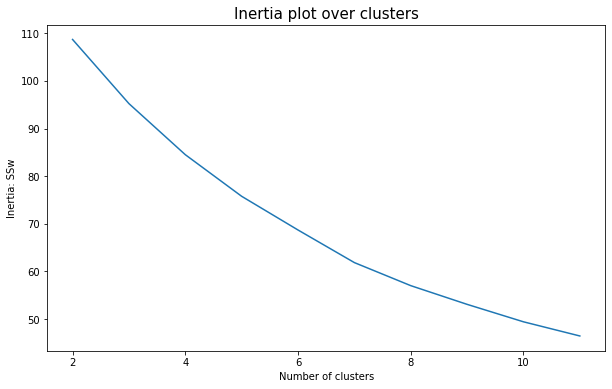

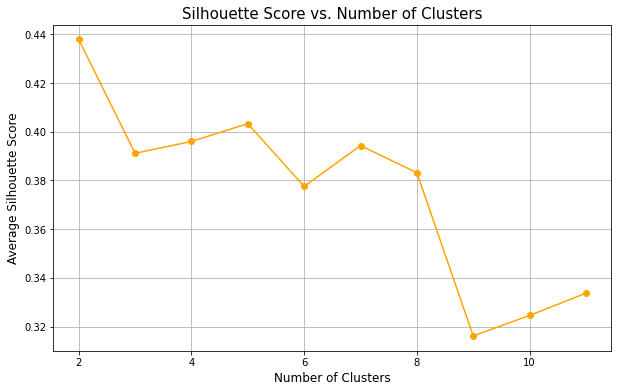

In [14]:
plt.figure(figsize=(10,6))
plt.plot(cluster_range, inertia)
plt.ylabel("Inertia: SSw")
plt.xlabel("Number of clusters")
plt.title("Inertia plot over clusters", size=15)
plt.show()

# Plot Average Silhouette Score
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, avg_silhouette, marker='o', color='orange')
plt.title("Silhouette Score vs. Number of Clusters", size=15)
plt.xlabel("Number of Clusters", size=12)
plt.ylabel("Average Silhouette Score", size=12)
plt.grid(True)
plt.show()

In [13]:
kmeans3 = KMeans(n_clusters=5, random_state=42)
kmeans_labels_psy = kmeans3.fit_predict(df_psy)
df_psy['cluster']=kmeans_labels_psy

# Results

In [14]:
def get_ss(df):
    """Computes the sum of squares for all variables given a dataset
    """
    ss = np.sum(df.var() * (df.count() - 1))
    return ss  # return sum of sum of squares of each df variable

def r2(df, labels):
    sst = get_ss(df)
    ssw = np.sum(df.groupby(labels).apply(get_ss))
    return 1 - ssw/sst
    
def get_r2_scores(df, clusterer, min_k=2, max_k=10):
    """
    Loop over different values of k. To be used with sklearn clusterers.
    """
    r2_clust = {}
    for n in range(min_k, max_k):
        clust = clone(clusterer).set_params(n_clusters=n)
        labels = clust.fit_predict(df)
        r2_clust[n] = r2(df, labels)
    return r2_clust

r2_scores = []
r2_scores.append(r2(df_behaviour, 'cluster'))
r2_scores.append(r2(df_demo, 'cluster'))
r2_scores.append(r2(df_psy, 'cluster'))

C:\Users\Casa-PC\AppData\Local\Temp/ipykernel_23088/1680433349.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  ssw = np.sum(df.groupby(labels).apply(get_ss))
C:\Users\Casa-PC\AppData\Local\Temp/ipykernel_23088/1680433349.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  ssw = np.sum(df.groupby(labels).apply(get_ss))
C:\Users\Casa-PC\AppData\Local\Temp/ipykernel_23088/1680433349.py:9: DeprecationWarnin

In [15]:
silhouette_avg_b= silhouette_score(df_behaviour, df_behaviour['cluster'])
silhouette_avg_d = silhouette_score(df_demo, df_demo['cluster'])
silhouette_avg_p = silhouette_score(df_psy, df_psy['cluster'])
silhouette_scores = [silhouette_avg_b, silhouette_avg_d, silhouette_avg_p]
segments = ['Behaviour', 'Demographic', 'Psychographic']
table = pd.DataFrame({
    'Segment': segments,
    'Silhouette Score': silhouette_scores,
    'r2 Score': r2_scores
})
print(table)

         Segment  Silhouette Score  r2 Score
0      Behaviour          0.760920  0.945475
1    Demographic          0.967999  0.999334
2  Psychographic          0.941581  0.997226


In [19]:
df_demo.to_csv('df_demo_k.csv')
df_psy.to_csv('df_psy_k.csv')

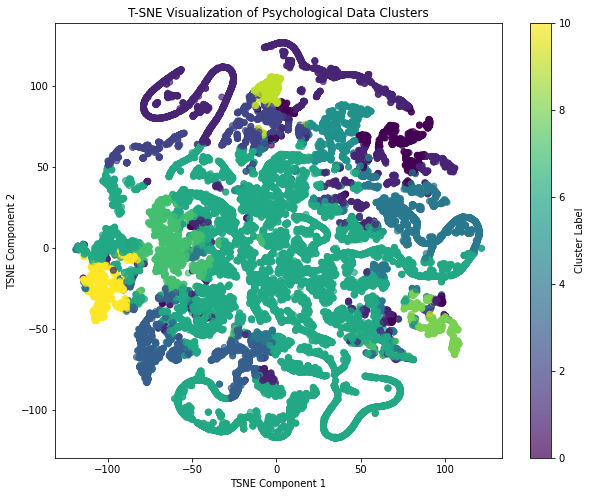

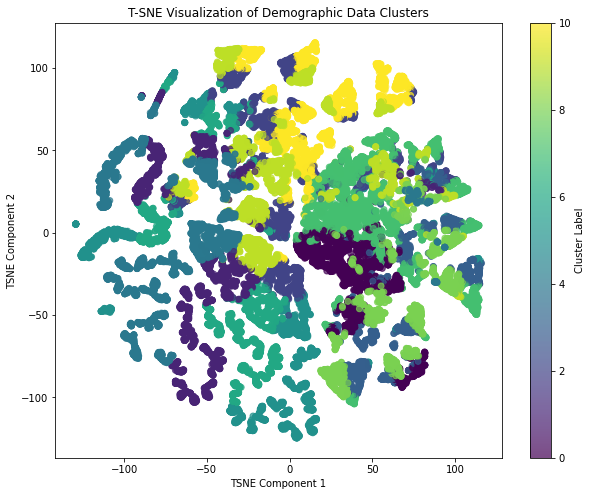

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

# Assuming df_psy and df_demo are already loaded DataFrames

def tsne_visualization(data, cluster_column, title):
    # Separate features and labels
    features = data.drop(columns=[cluster_column])
    labels = data[cluster_column]

    # Normalize features
    scaler = StandardScaler()
    features_scaled = scaler.fit_transform(features)

    # Apply t-SNE
    tsne = TSNE(n_components=2, random_state=42)
    tsne_results = tsne.fit_transform(features_scaled)

    # Create scatter plot
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=labels, cmap='viridis', alpha=0.7)
    plt.colorbar(scatter, label='Cluster Label')
    plt.title(f'T-SNE Visualization of {title}')
    plt.xlabel('TSNE Component 1')
    plt.ylabel('TSNE Component 2')
    plt.show()

# Visualize df_psy
tsne_visualization(df_psy, cluster_column='cluster', title='Psychological Data Clusters')

# Visualize df_demo
tsne_visualization(df_behaviour, cluster_column='cluster', title='Demographic Data Clusters')